<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/5_Limit%20Cycles/Ciclos_Limite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema Lodka Volterra



Presa-Depredador

$$ \frac{dx}{dt}=\alpha x-\beta xy $$
$$ \frac{dy}{dt}=\delta xy - \gamma y $$

donde:

* $y$ es el número de algún predador (por ejemplo, un leones);
* $x$ es el número de sus presas (por ejemplo, cebras);
* $\frac{dy}{dt}$ y $\frac{dx}{dt}$ representa el crecimiento de las dos poblaciones en el tiempo;t representa el tiempo.

* $\alpha$: tasa de crecimiento de las presas.

* $\beta$: éxito en la caza del depredador.

* $\gamma$: tasa de decrecimiento de los depredadores.

* $\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.





In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

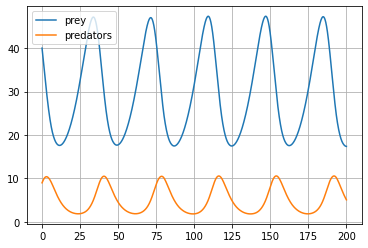

In [ ]:
def LodkaVolterra (t,xy,alpha,beta,gamma,delta):
  x,y=xy
  return [alpha*x-beta*x*y, -gamma*y+delta*x*y]


a,b,c,d= 0.1, 0.02,0.3,0.01


t_in=0
t_fin=200
xy0=[40, 9]
tspam=[t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)
sol=solve_ivp(LodkaVolterra,tspam,xy0,args=(a,b,c,d),t_eval=t)
plt.plot(sol.t, sol.y[0],label='prey')
plt.plot(sol.t, sol.y[1],label='predators')
#plt.axis([t_in,t_fin,0,15])
plt.legend()

#plt.axis([ti, tf, -10, 10])
plt.grid()

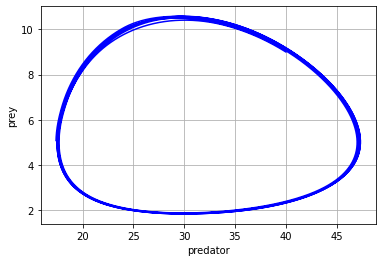

In [ ]:
plt.plot(sol.y[0], sol.y[1],label='prey',color='blue')
plt.grid()
plt.ylabel('prey')
plt.xlabel('predator')
plt.show()



#Van der Pol Oscillator

Gived the differential equation

$$ \frac{d^2 x}{dt^2} - \mu(1-x^2)\frac{dx}{dt}+x=0 $$



## Phase Portrait

To introduce a second-order differential equation in solve_ipv we can transform the Van der Pol equation in two first-order equations as:
$$ \frac{d x}{dt} = z $$
$$ \frac{d z}{dt} = \mu(1-x^2)*y-x $$

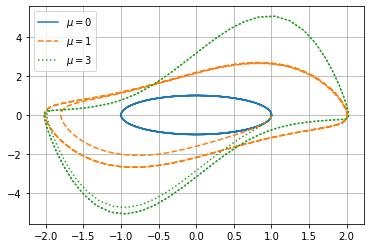

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 

def vdp(t,z):
  x,y=z 
  return[y,mu*(1-x**2)*y-x]

a,b=0,20
mus=[0,1,3]
styles=["-","--",":"]
t=np.linspace(a,b,500)

for mu,style in zip(mus,styles):
  sol=solve_ivp(vdp,[a,b],[1,0],t_eval=t)
  plt.plot(sol.y[0],sol.y[1],style)
plt.legend([f"$\mu={m}$" for m in mus])
plt.grid()

## Time domain

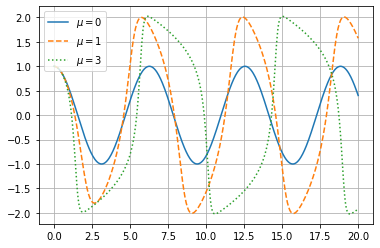

In [ ]:
for mu,style in zip(mus,styles):
  sol=solve_ivp(vdp,[a,b],[1,0],t_eval=t)
  plt.plot(sol.t,sol.y[0],style)
plt.legend([f"$\mu={m}$" for m in mus])
plt.grid()

##Calculating the period of Van der Pol oscillators

[ 0.13378167  0.00598674 -0.00364846  0.00485927 -0.00470854 -0.00131516
  0.00661561 -0.00138286 -0.00435207]


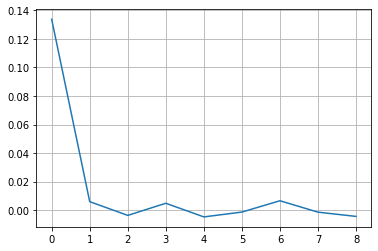

In [ ]:
def root(t,y): return y[0]
mu=2

sol=solve_ivp(vdp,[0,40],[1,0],t_eval=t,events=root)
zeros=sol.t_events[0]

space= zeros[1:]-zeros[:-1]
delta= space[1:]-space[:-1]
print(delta)

plt.plot(delta)
plt.grid()
# plt.axes().set_aspect(1)

# Lorenz equation

$$ \frac{dx}{dt}=\sigma(y-x) $$
$$ \frac{dy}{dt}=x(\rho-z)-y $$
$$ \frac{dz}{dt}=xy-\beta x $$

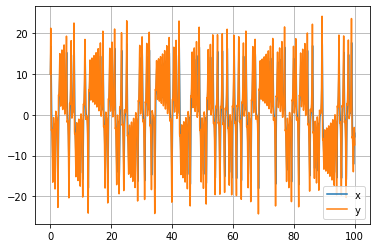

In [ ]:
def Lorenz (t,xyz,sigma,rho,beta):
  x,y,z=xyz
  return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]


sigma,rho,beta= 10,28,8/3


t_in=0
t_fin=100
xy0=[10, 10, 10]
tspam=[t_in,t_fin]
t=np.linspace(t_in,t_fin,10000)
sol=solve_ivp(Lorenz,tspam,xy0,args=(sigma,rho,beta),t_eval=t)
plt.plot(sol.t, sol.y[0],label='x')
plt.plot(sol.t, sol.y[1],label='y')
#plt.axis([t_in,t_fin,0,15])
plt.legend()

#plt.axis([ti, tf, -10, 10])
plt.grid()

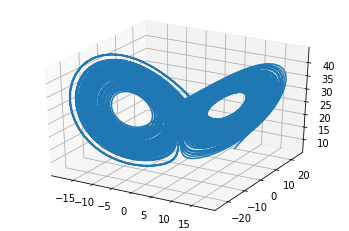

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
#ax.scatter3D(,"o",color="black")
plt.show()

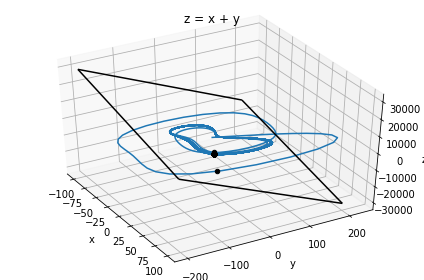

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define function

def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

# Define events function

def event_lorenz (t,y,sigma,rho,beta):
  return y[0]+y[1]+0.01*y[2]
#event_lorenz.terminal=True ## Interrup the simulation in the first event
event_lorenz.direction=-1

# Define simulation parameters

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

# Solve the IVP equation 
sol=solve_ivp(lorenz,[a,b],y0,args=(10,230,8/3),t_eval=t,events=event_lorenz)

fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax = plt.axes(projection='3d')

# Plot the solution

ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
ax.set(xlabel='x', ylabel='y', zlabel='z', title='z = x + y')

# Plot the events
for i in range(sol.y_events[0].shape[0]):
  ax.scatter3D(sol.y_events[0][i][0],sol.y_events[0][i][1],sol.y_events[0][i][2],"o",color="black")

# Plot the events plane
(xx, yy) = np.meshgrid(np.linspace(-100,100,2), np.linspace(-200,200,2))
zz = 100*(-xx - yy)
ax.plot_wireframe(xx, yy, zz,color='black')

fig.tight_layout()
ax.view_init(elev=40, azim=-30)
plt.show()

In [ ]:
print(sol.y_events[0].shape)

(105, 3)


## Bifurcaciones

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time= 249.639676


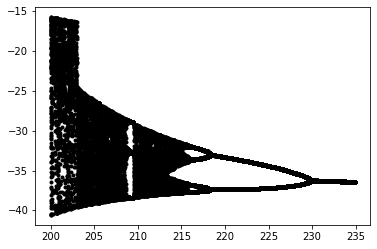

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

def event_lorenz (t,y,sigma,rho,beta):
  return y[0]+y[1]
# event_lorenz.terminal=True
event_lorenz.direction=-1

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(200,235,0.1):
  sol=solve_ivp(lorenz,[a,b],y0,args=(10,r,8/3),t_eval=t,events=event_lorenz,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)
#print(sol.y_events[0])
# ax = plt.axes(projection='3d')
# ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
# ax.scatter3D(k[-3:-1,0],k[-3:-1,1],k[-3:-1,2],"o",color="black")
# plt.show()


# plt.xlabel('$\rho$')
# plt.ylabel('$x(t)$')
# plt.grid();


In [ ]:
k.size



318

#Atractor de Rossler

$$ \frac{dx}{dt}=y-z $$
$$ \frac{dy}{dt}=x+Ay $$
$$ \frac{dz}{dt}=\beta + z(x-C) $$

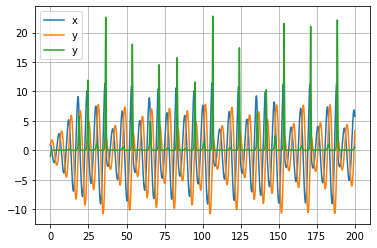

In [ ]:
def Rossler (t,xyz,A,B,C):
  x,y,z=xyz
  return [-y-z, x+A*y, B+z*(x-C)]


A,B,C= 0.2,0.2,5.7


t_in=0
t_fin=200
xy0=[1, 1, -1]
tspam=[t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)
sol=solve_ivp(Rossler,tspam,xy0,args=(A,B,C),t_eval=t)
plt.plot(sol.t, sol.y[0],label='x')
plt.plot(sol.t, sol.y[1],label='y')
plt.plot(sol.t, sol.y[2],label='y')
#plt.axis([t_in,t_fin,0,15])
plt.legend()

#plt.axis([ti, tf, -10, 10])
plt.grid()

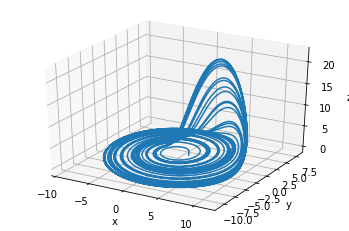

In [ ]:
#plt.plot(sol.y[0], sol.y[1],label='prey')
# plt.grid()
# plt.ylabel('prey')
# plt.xlabel('predator')

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
#ax.scatter3D(,"o",color="black")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#Polting 3D

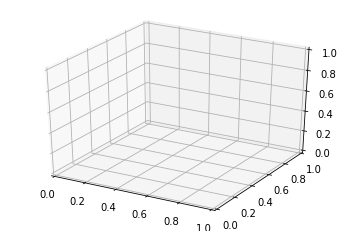

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

ax= plt.axes(projection="3d")

In [ ]:
!pip install ipyvolume


In [ ]:
import ipyvolume as ipv
import numpy as np
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))
fig = ipv.figure()
scatter = ipv.scatter(x, y, z)
ipv.show()